<a href="https://colab.research.google.com/github/dani-lbnl/mudit/blob/main/Topic_Modeling_Top2Vec_BERTopic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Packages Installation

In [1]:
!pip install --upgrade llvmlite
!pip install --upgrade git+https://github.com/scikit-learn-contrib/hdbscan.git#egg=hdbscan
# !pip install top2vec  # easy way to install Top2Vec
!pip install top2vec[sentence_encoders]  # install if using pre-trained universal sentence encoder options
# !pip install top2vec[sentence_transformers]  # install if using pre-trained BERT sentence transformer options

     |████████████████████████████████| 34.5 MB 6.8 kB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0
    Uninstalling llvmlite-0.34.0:
      Successfully uninstalled llvmlite-0.34.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.51.2 requires llvmlite<0.35,>=0.34.0.dev0, but you have llvmlite 0.38.0 which is incompatible.
  Cloning https://github.com/scikit-learn-contrib/hdbscan.git to /tmp/pip-install-9a4hi_oa/hdbscan_6940706b109a4afc897bf463c552c4c3
  Running command git clone -q https://github.com/scikit-learn-contrib/hdbscan.git /tmp/pip-install-9a4hi_oa/hdbscan_6940706b109a4afc897bf463c552c4c3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2330782

In [2]:
from top2vec import Top2Vec
import pandas as pd
import numpy as np
import multiprocessing
import time

multiprocessing.cpu_count()

2

## Preparing dataframe

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
df = pd.read_table('/content/drive/MyDrive/LBNL/Pubs.xls')
abstracts = list(df[~df['Abstract'].isna()]['Abstract'])

In [5]:
# for title
indices = df['Title'].isna()
df.loc[indices,'Title'] = ""

# for abstract
indices = df['Abstract'].isna()
df.loc[indices,'Abstract'] = ""

# combined - title + abstract
df['Combined'] = df['Title'] + " " + df['Abstract']
combined = list(df['Combined'])

In [6]:
# remove stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
  

new_df= []
for doc in combined:
  filt_combined = []
  for word in word_tokenize(doc):
    # print(word)
    if word not in stopwords.words('english'):
      # print(word)
      filt_combined.append(word)
  new_df.append(" ".join(filt_combined))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [7]:
new_df

['Insights in-situ x-ray computed tomography axial impregnation unidirectional fiber beds',
 'Effect aging toughness human cortical bone : Evaluation R-curves Age-related deterioration fracture properties bone , coupled increased life expectancy , responsible increasing incidence bone fracture elderly , hence , understanding fracture properties degrade age essential . The present study describes ex vivo fracture experiments quantitatively assess effect aging fracture toughness properties human cortical bone longitudinal direction . Because cortical bone exhibits rising crack-growth resistance crack extension , unlike previous studies , toughness evaluated terms resistance-curve ( R-curve ) behavior , measured bone taken wide range age groups ( 34-99 years ) . Using approach , ex vivo crack-initiation crack-growth toughness determined found deteriorate age ; initiation toughness decreases 40 % 6 decades 40 100 years , growth toughness effectively eliminated age range . The reduction cra

## Top2Vec on pubs.xlsx

#### on combined (stop words not removed)

In [8]:
start_time = time.time()
# model_reviews = Top2Vec(documents=hotel_reviews, speed="deep-learn", workers=multiprocessing.cpu_count())
model_reviews = Top2Vec(documents=combined, embedding_model='universal-sentence-encoder')
# model_reviews = Top2Vec(documents=hotel_reviews, embedding_model='distiluse-base-multilingual-cased')  # run on GPU to speed things up
print('Total time taken (mins): ', int((time.time()-start_time)/60))

# model_reviews = Top2Vec(documents=hotel_reviews, embedding_model='universal-sentence-encoder')  # uncomment to use universal sentence encoder
# model_reviews = Top2Vec(documents=hotel_reviews, speed="deep-learn", workers=multiprocessing.cpu_count())  # uncomment to use Doc2Vec

2022-03-25 16:14:01,234 - top2vec - INFO - Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-03-25 16:14:01,548 - top2vec - INFO - Downloading universal-sentence-encoder model
2022-03-25 16:14:22,196 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-03-25 16:14:25,476 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  war

Total time taken (mins):  0


In [9]:
# show the total number of topics
model_reviews.get_num_topics() 

3

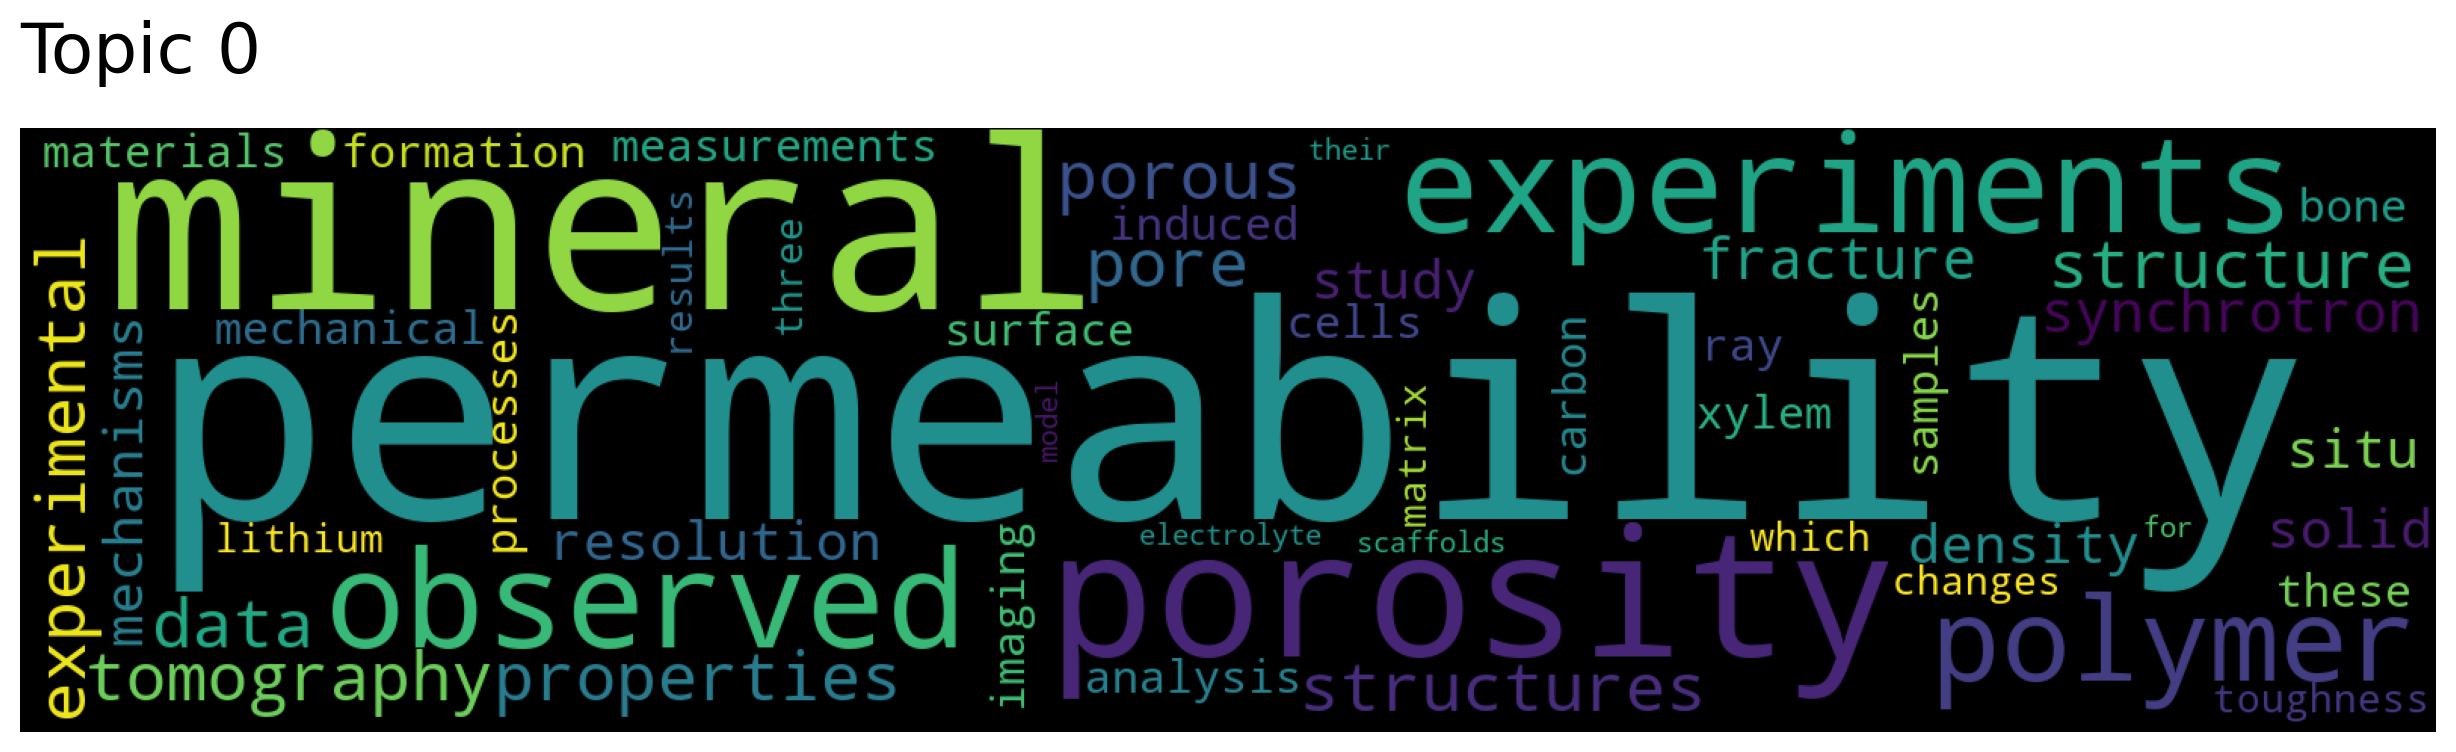

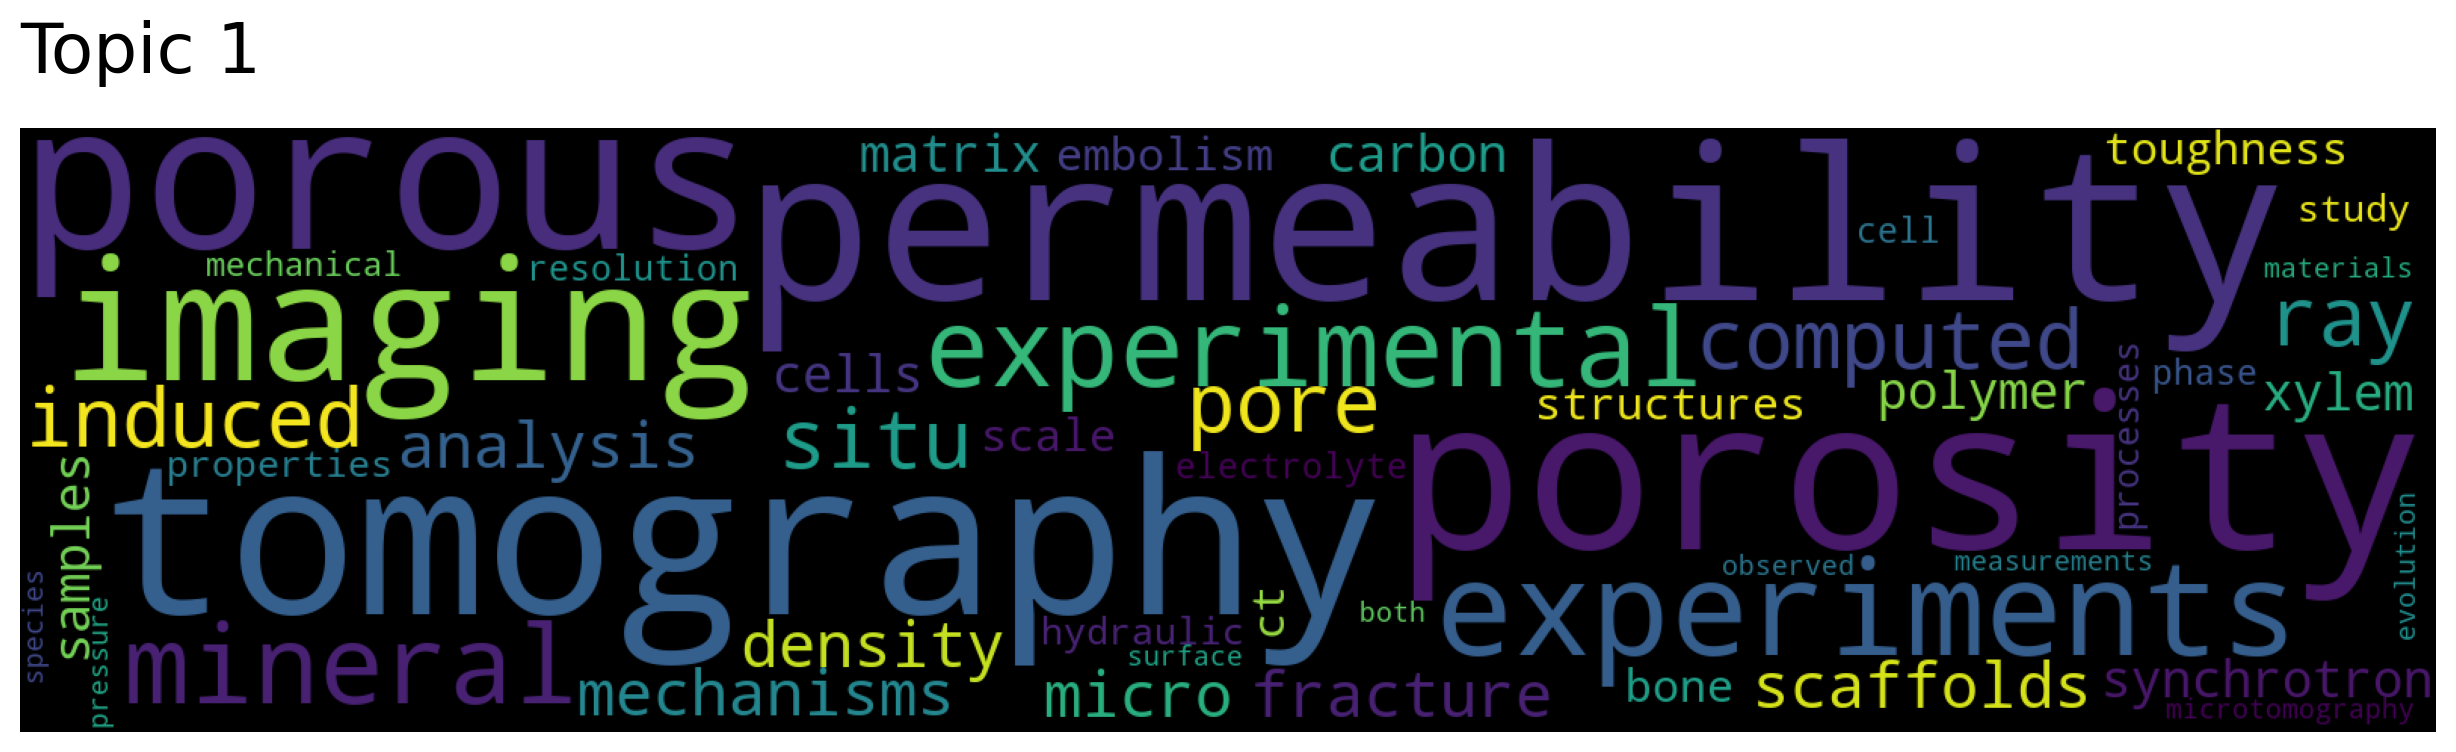

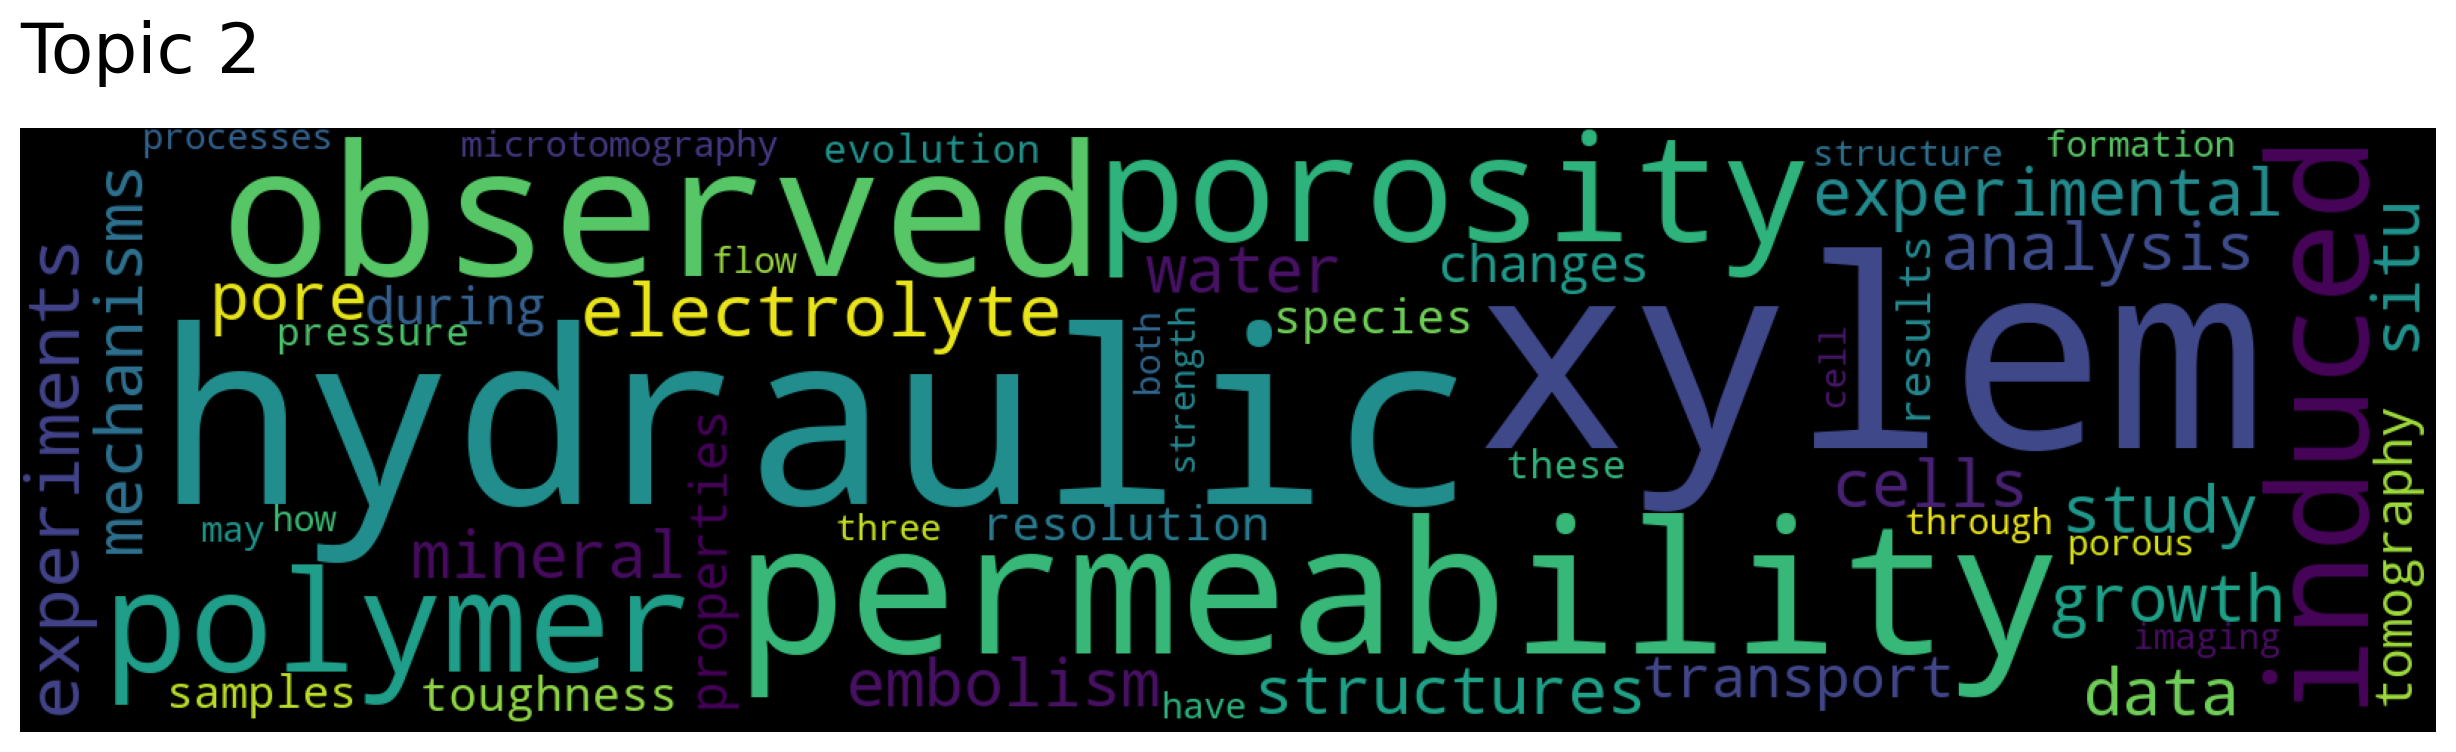

In [10]:
topic_words, word_scores, topic_nums = model_reviews.get_topics(model_reviews.get_num_topics())
for topic in topic_nums[:7]:
    model_reviews.generate_topic_wordcloud(topic)

In [11]:
# find cosuments most similar to topic 1
documents, document_scores, document_ids = model_reviews.search_documents_by_topic(topic_num=1, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 258, Score: 0.6896003484725952
-----------
Pore-scale multiphase flow modeling and imaging of CO[d2] exsolution in Sandstone 
-----------

Document: 238, Score: 0.6663891673088074
-----------
X-ray Phase Imaging and Computed Tomography with Sandpaper Analyzer 
-----------

Document: 370, Score: 0.6642224788665771
-----------
Pore-scale and topology analysis of flame stabilization inside inert porous media using X-ray microtomography 
-----------

Document: 302, Score: 0.6610965728759766
-----------
Micro-Scale Analysis of Liquid Water Breakthrough inside Gas Diffusion Layer for PEMFC Using X-ray Computed Tomography and Lattice Boltzmann Method 
-----------

Document: 275, Score: 0.6594442129135132
-----------
Electrode slurry particle density mapping using X-ray radiography 
-----------



In [12]:
words, word_scores = model_reviews.similar_words(keywords=["tomography"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

imaging 0.5299621288647671
embolism 0.4667333559005267
ct 0.43697211709808015
synchrotron 0.4169693143002183
microtomography 0.4099750027971195
induced 0.40701209028497626
scaffolds 0.3840783556885203
matrix 0.36890877524056054
cells 0.3666332735027048
mineral 0.3581242161851964
fracture 0.357955406265151
analysis 0.3474062086140899
mechanical 0.3432506227140724
porous 0.3305312141404452
bone 0.3301880112442652
permeability 0.325324504148819
electrolyte 0.3189053352742297
experiments 0.3138263454432384
cell 0.3038608015715143
micro 0.30229144494717


In [13]:
# search doc by keywords
documents, document_scores, document_ids = model_reviews.search_documents_by_keywords(keywords=["tomography"], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 241, Score: 0.3811495028762352
-----------
High temperature x-ray micro-tomography 
-----------

Document: 151, Score: 0.3225662086363652
-----------
Coded Aperture  Imaging  for  Fluorescent  X-rays-Biomedical Applications 
-----------

Document: 275, Score: 0.298344915744113
-----------
Electrode slurry particle density mapping using X-ray radiography 
-----------

Document: 238, Score: 0.29227489682608704
-----------
X-ray Phase Imaging and Computed Tomography with Sandpaper Analyzer 
-----------

Document: 437, Score: 0.2784515630505565
-----------
Scalable method for micro-CT analysis enables large scale quantitative characterization of brain lesions and implants Anatomic evaluation is an important aspect of many studies in neuroscience; however, it often lacks information about the three-dimensional structure of the brain. Micro-CT imaging provides an excellent, nondestructive, method for the evaluation of brain structure, but current applications to neurophysiological 

#### on new_df (stopwords removed)


In [14]:
start_time = time.time()
# model_reviews = Top2Vec(documents=hotel_reviews, speed="deep-learn", workers=multiprocessing.cpu_count())
model_stop_removed = Top2Vec(documents=new_df, embedding_model='universal-sentence-encoder')
# model_reviews = Top2Vec(documents=hotel_reviews, embedding_model='distiluse-base-multilingual-cased')  # run on GPU to speed things up
print('Total time taken (mins): ', int((time.time()-start_time)/60))

# model_reviews = Top2Vec(documents=hotel_reviews, embedding_model='universal-sentence-encoder')  # uncomment to use universal sentence encoder
# model_reviews = Top2Vec(documents=hotel_reviews, speed="deep-learn", workers=multiprocessing.cpu_count())  # uncomment to use Doc2Vec

2022-03-25 16:14:42,019 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-03-25 16:14:42,333 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2022-03-25 16:14:47,303 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-03-25 16:14:47,909 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-03-25 16:14:52,235 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-03-25 16:14:52,255 - top2v

Total time taken (mins):  0


In [15]:
# show the total number of topics
model_stop_removed.get_num_topics() 

5

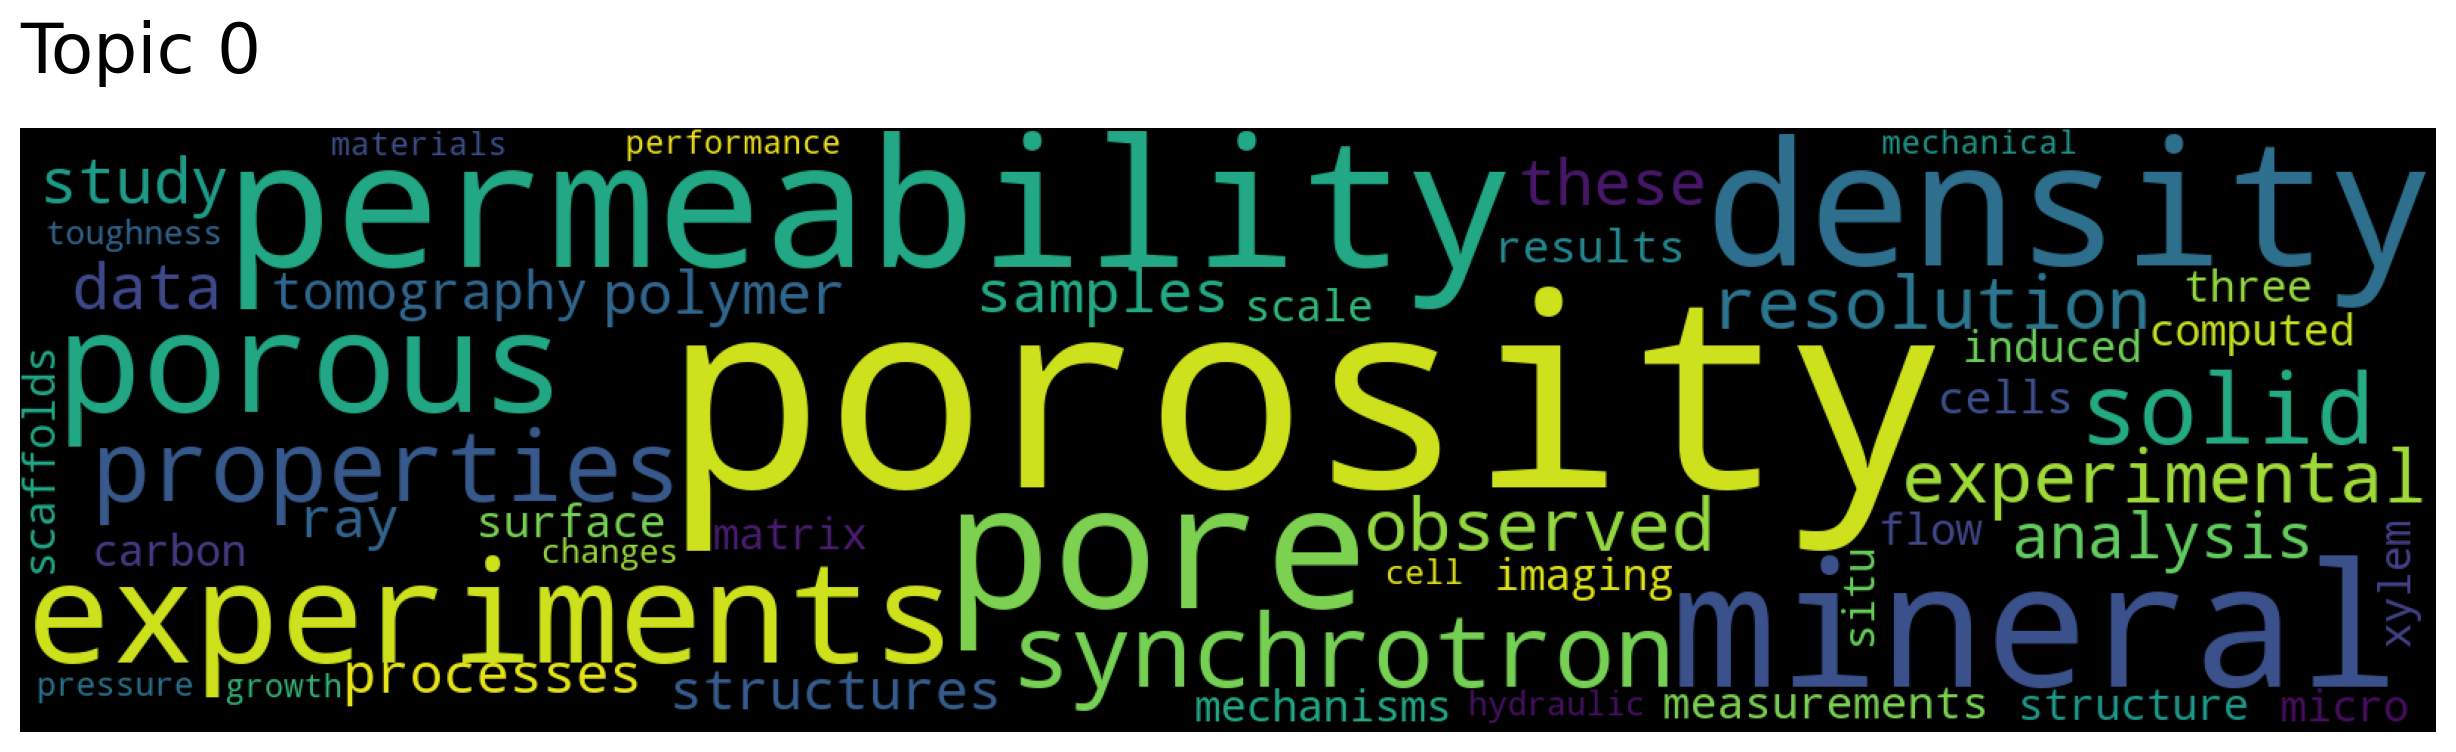

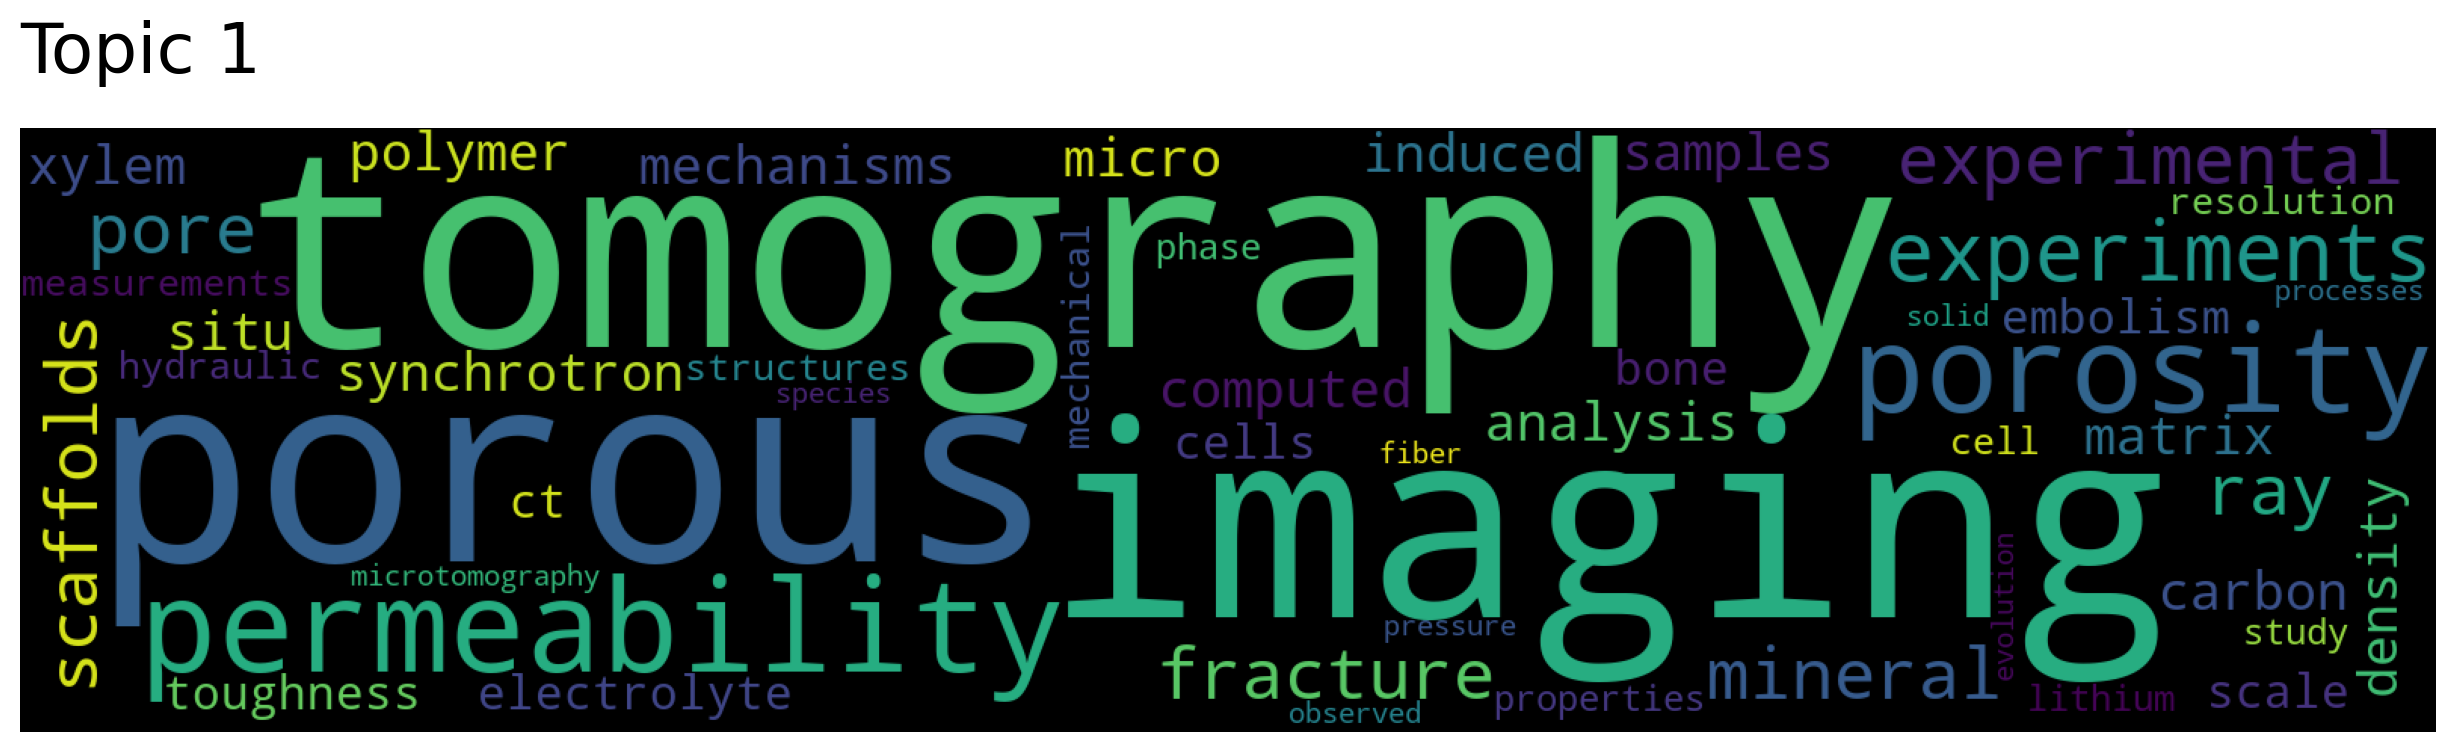

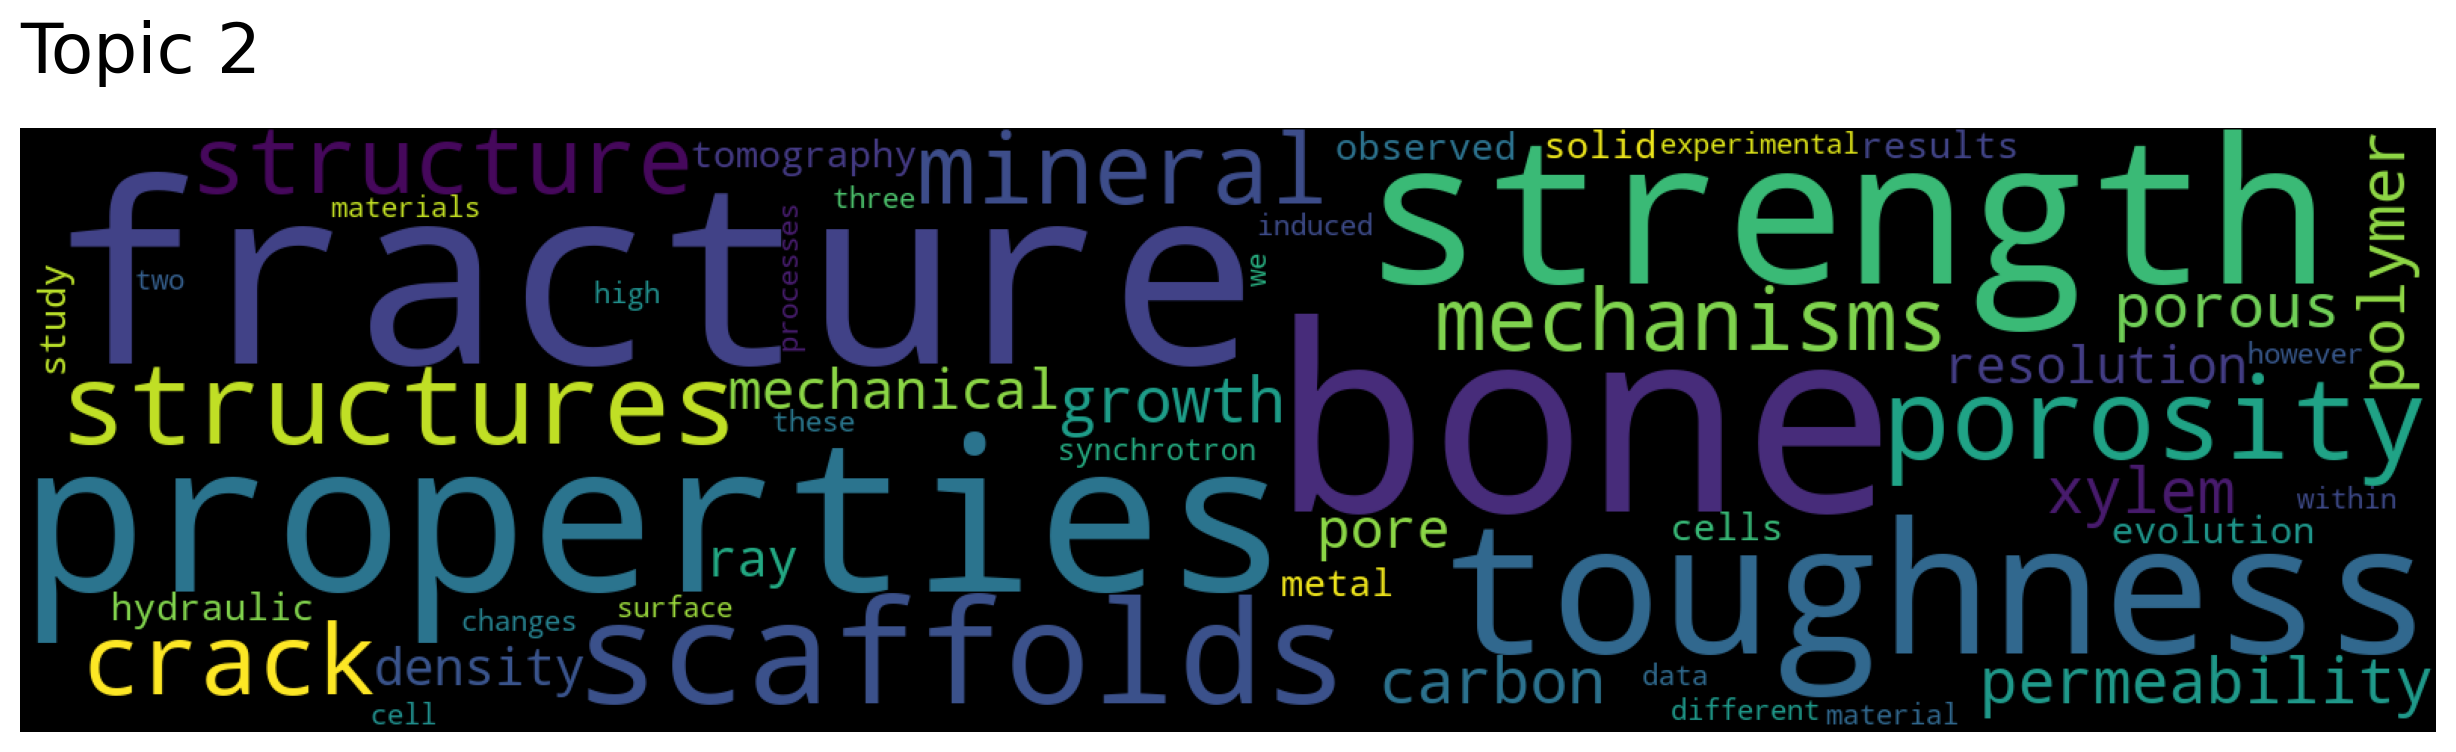

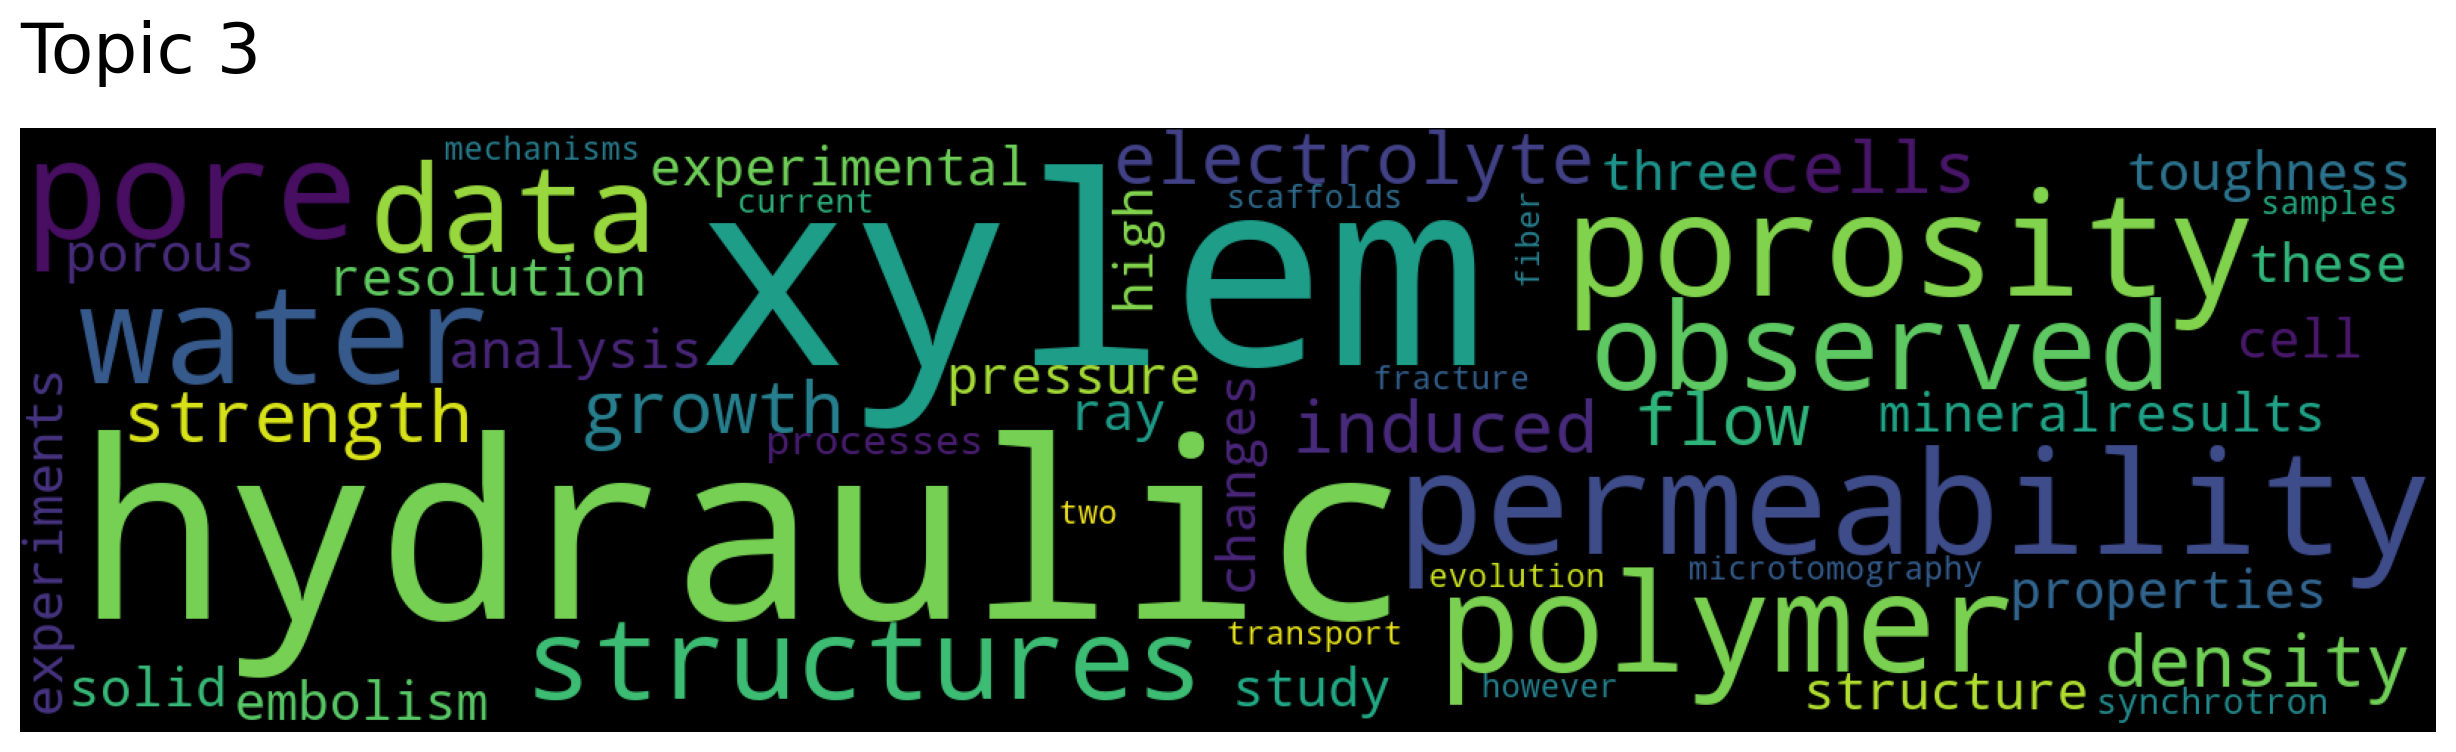

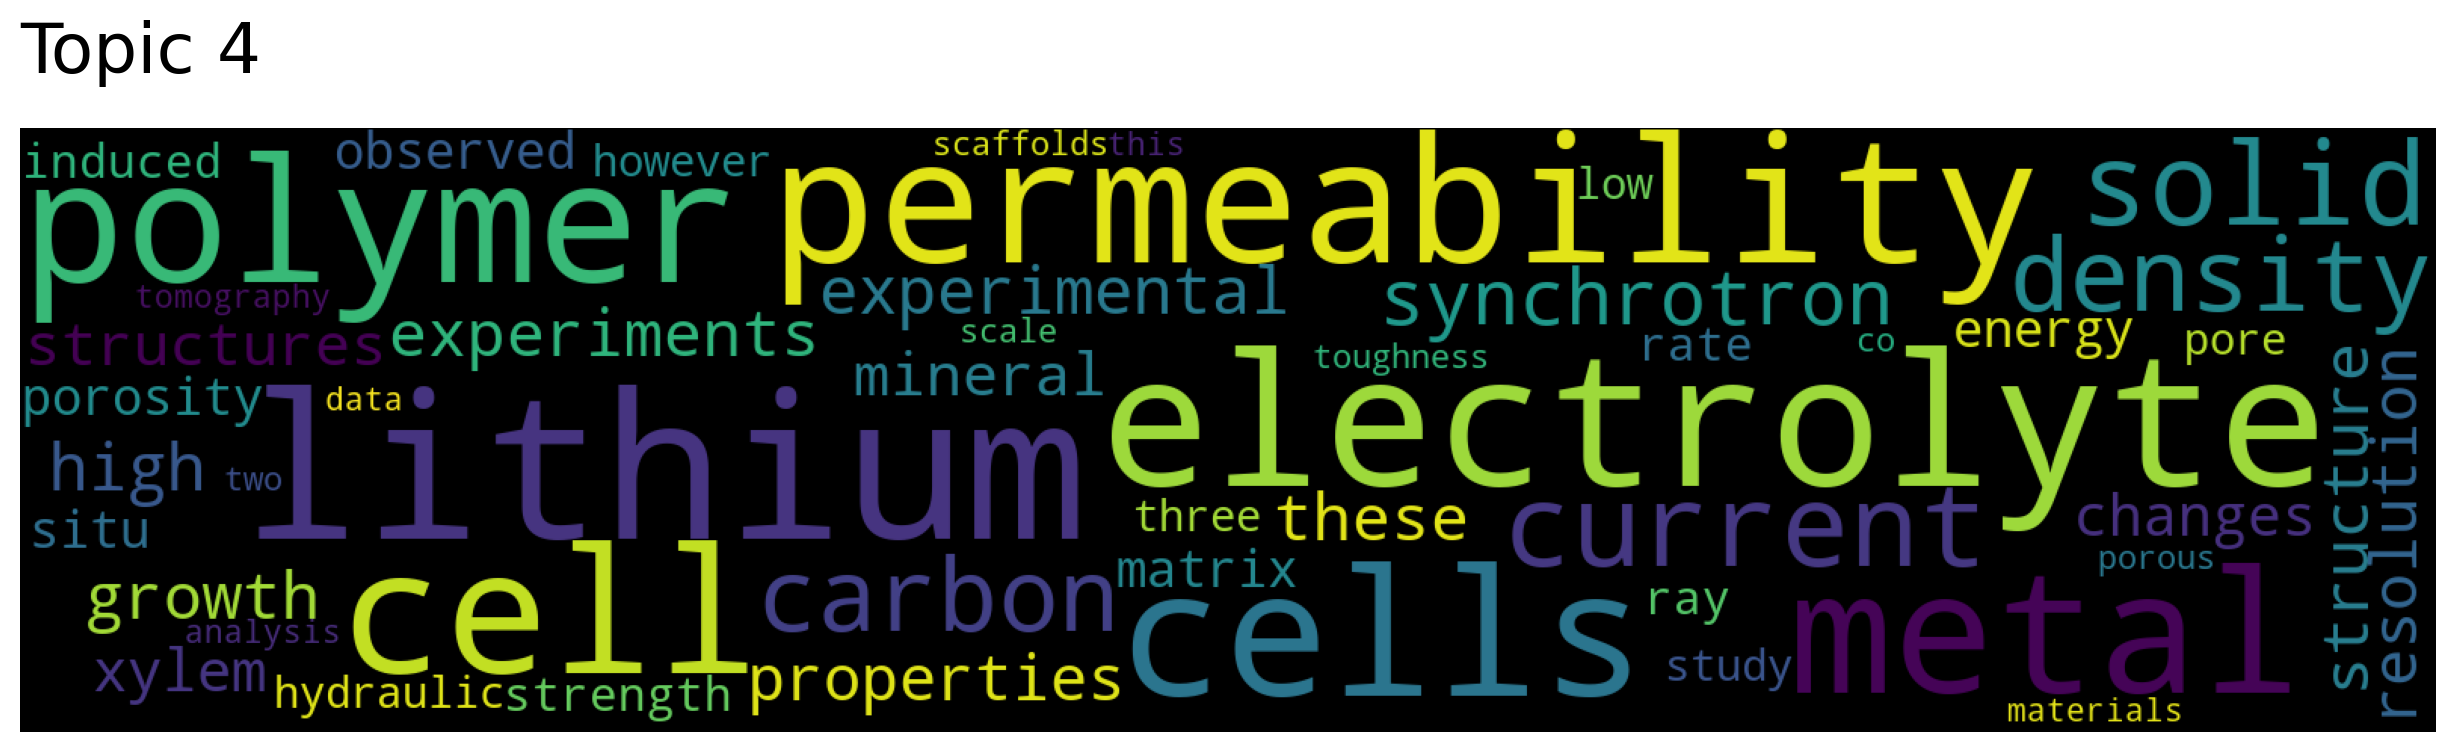

In [16]:
topic_words, word_scores, topic_nums = model_stop_removed.get_topics(model_stop_removed.get_num_topics())
for topic in topic_nums[:7]:
    model_stop_removed.generate_topic_wordcloud(topic)

In [17]:
# find cosuments most similar to topic 1
documents, document_scores, document_ids = model_stop_removed.search_documents_by_topic(topic_num=1, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 258, Score: 0.7146670818328857
-----------
Pore-scale multiphase flow modeling imaging CO [ d2 ] exsolution Sandstone
-----------

Document: 30, Score: 0.690532922744751
-----------
Probing Dynamics Biomineralization Pore Scale Using X-ray Computed Tomography
-----------

Document: 238, Score: 0.6702353954315186
-----------
X-ray Phase Imaging Computed Tomography Sandpaper Analyzer
-----------

Document: 27, Score: 0.6651724576950073
-----------
X-ray micro-tomography imaging crack propagation biological samples
-----------

Document: 370, Score: 0.6647559404373169
-----------
Pore-scale topology analysis flame stabilization inside inert porous media using X-ray microtomography
-----------



In [18]:
words, word_scores = model_stop_removed.similar_words(keywords=["tomography"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

imaging 0.5299621777649944
embolism 0.4667333925464471
ct 0.4369721093403249
synchrotron 0.41696935944293373
microtomography 0.4099750433294113
induced 0.4070120909003778
scaffolds 0.3840783589033091
matrix 0.3689087712141358
cells 0.3666332967044179
mineral 0.35812424812444954
fracture 0.3579554173039311
analysis 0.34740616936226365
mechanical 0.34325065993465137
porous 0.330531238530303
bone 0.33018809454110803
permeability 0.32532448405720227
electrolyte 0.31890531565539804
experiments 0.31382637256671875
cell 0.3038608115222295
micro 0.30229137231336367


### BERTopic

In [19]:
!pip install bertopic

     |████████████████████████████████| 57 kB 2.8 MB/s 
     |████████████████████████████████| 79 kB 6.7 MB/s 
     |████████████████████████████████| 3.8 MB 42.6 MB/s 
     |████████████████████████████████| 1.2 MB 36.0 MB/s 
     |████████████████████████████████| 67 kB 4.7 MB/s 
     |████████████████████████████████| 895 kB 40.8 MB/s 
     |████████████████████████████████| 6.5 MB 38.8 MB/s 
     |████████████████████████████████| 636 kB 50.2 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=e076472d9325659acc7ff1fff5115a9ab5fb2807abe27a7889b835e06d972289
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [20]:
pip install bertopic[spacy]

     |████████████████████████████████| 6.0 MB 5.4 MB/s 
     |████████████████████████████████| 653 kB 37.9 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
     |████████████████████████████████| 451 kB 38.4 MB/s 
     |████████████████████████████████| 181 kB 34.1 MB/s 
     |████████████████████████████████| 10.1 MB 30.7 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


In [21]:
from bertopic import BERTopic

In [22]:
topic_model_stop = BERTopic()
topics, probs = topic_model_stop.fit_transform(new_df)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [23]:
topic_model_stop.get_topic_info()

Topic  Count                                          Name
0      -1     88                    -1_xray_the_ash_tomography
1       0     65          0_bone_fracture_properties_toughness
2       1     54                      1_inf_pore_area_reactive
3       2     46                   2_xylem_embolism_vessel_inf
4       3     37               3_transport_water_catalyst_fuel
5       4     35               4_pumice_magma_eruption_bubbles
6       5     28  5_lithium_batteries_electrolyte_electrolytes
7       6     22         6_data_algorithms_parallel_facilities
8       7     19                   7_xray_phase_synchrotron_3d
9       8     16          8_species_cheliceral_spiders_muscles
10      9     16               9_matrix_composites_fiber_parts
11     10     14          10_soil_water_rhizosphere_phosphorus

In [24]:
topic_model_stop.visualize_topics()


In [25]:
topic_model_stop.visualize_barchart()

In [26]:
topic_model_stop.visualize_heatmap()

### Using SciBERT

In [27]:
!pip install flair

     |████████████████████████████████| 322 kB 4.9 MB/s 
     |████████████████████████████████| 1.2 MB 10.3 MB/s 
     |████████████████████████████████| 53 kB 1.6 MB/s 
     |████████████████████████████████| 19.7 MB 609 kB/s 
     |████████████████████████████████| 788 kB 45.4 MB/s 
     |████████████████████████████████| 981 kB 39.3 MB/s 
     |████████████████████████████████| 46 kB 3.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 48 kB 5.0 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
  Created wheel for gdown: filename=gdown-3.12.2-py3-none-any.whl size=9692 sha256=1efcfcc52fa8ea97a9252d1b92eebff1a59884bf07d1d2b21aa9bb5cced2bf76
  Stored in directory: /root/.cache/pip/wheels/ba/e0/7e/726e872a53f7358b4b96a9975b04e98113b005cd8609a63abc
  Created wheel for mpld3: filename=mpld3-0.3-py3-none-any.whl size=116702 sha256=f07e8c1f9b09c7a65ad6d51c

In [28]:
from flair.embeddings import TransformerDocumentEmbeddings

scibert_emb = TransformerDocumentEmbeddings('allenai/scibert_scivocab_uncased')
topic_model_scibert = BERTopic(embedding_model=scibert_emb)

Downloading:   0%|          | 0.00/385 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/223k [00:00<?, ?B/s]

2022-03-25 16:17:35,027 No model_max_length in Tokenizer's config.json - setting it to 512. Specify desired model_max_length by passing it as attribute to embedding instance.


Downloading:   0%|          | 0.00/422M [00:00<?, ?B/s]

In [29]:
import time
start_time = time.time()
topic_model_scibert = BERTopic()
topics_scibert, probs_scibert = topic_model_scibert.fit_transform(new_df)
print('Total time taken (mins): ', int((time.time()-start_time)/60))


Total time taken (mins):  0


In [30]:
topic_model_scibert.get_topic_info()

Topic  Count                                          Name
0      -1     76                    -1_the_xray_ash_conversion
1       0     63          0_bone_fracture_properties_toughness
2       1     58                  1_inf_pore_permeability_area
3       2     44                   2_xylem_embolism_vessel_inf
4       3     39               3_transport_water_catalyst_fuel
5       4     35               4_pumice_magma_eruption_bubbles
6       5     28  5_lithium_batteries_electrolyte_electrolytes
7       6     22                   6_xray_phase_synchrotron_3d
8       7     21         7_data_algorithms_facilities_parallel
9       8     17          8_species_cheliceral_spiders_muscles
10      9     14           9_soil_water_rhizosphere_phosphorus
11     10     13       10_fiber_matrix_impregnation_composites
12     11     10               11_steel_corrosion_paste_cement

In [31]:
topic_model_scibert.visualize_topics()

In [32]:
topic_model_scibert.visualize_barchart()

In [35]:
topic_model_scibert.get_topic(5)[:10]

[('lithium', 0.10401353606010086),
 ('batteries', 0.05923341998526987),
 ('electrolyte', 0.054104479700678075),
 ('electrolytes', 0.042543083660135025),
 ('metal', 0.04079076854908935),
 ('electrode', 0.03894441059009596),
 ('dendrite', 0.03859930950249845),
 ('density', 0.03856312808911955),
 ('electrochemical', 0.030502719945989222),
 ('battery', 0.03029130781583312)]

In [36]:
topic_model_stop.get_topic(5)[:10]

[('lithium', 0.10626971397319993),
 ('batteries', 0.06032261746847914),
 ('electrolyte', 0.05516203478780449),
 ('electrolytes', 0.043254486889162336),
 ('metal', 0.041552473383767434),
 ('electrode', 0.039652843695332965),
 ('density', 0.03937172170582494),
 ('dendrite', 0.03922923720394737),
 ('electrochemical', 0.031048194033610314),
 ('battery', 0.030757810117126957)]

#### lemmatized

In [43]:
import nltk
nltk.download('wordnet')
  

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

In [45]:
>>> from nltk import word_tokenize          
>>> from nltk.stem import WordNetLemmatizer 
>>> class LemmaTokenizer:
...     def __init__(self):
...         self.wnl = WordNetLemmatizer()
...     def __call__(self, doc):
...         return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

In [46]:
tf_vectorizer = CountVectorizer(tokenizer=LemmaTokenizer())
# vectorizer_model = CountVectorizer(stop_words="English", ngram_range=(1, 5))
topic_model_scibert.update_topics(new_df, topics_scibert, vectorizer_model=tf_vectorizer)

In [47]:
topic_model_scibert.visualize_barchart()

In [48]:
topic_model_scibert.get_topic(5)[:10]

[('lithium', 0.10249655295643657),
 ('electrolyte', 0.08035786949918991),
 ('battery', 0.07653476379257243),
 ('electrode', 0.05701690802994957),
 ('dendrite', 0.04931683396848524),
 ('density', 0.04230262824025512),
 ('anode', 0.04189825540732167),
 ('metal', 0.03955523301428068),
 ('cell', 0.03404191897304466),
 ('protrusion', 0.03365026359337522)]

### only on Energy Sci Domain